In [1]:
import numpy as np
import pandas as pd
from scipy.fft import fft, ifft
import cmath

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt

### Импорт данных

In [3]:
list_of_angles = [51, 52, 53, 54, 55, 56, 57, 58, 60]

In [4]:
first_app = True
for angle in list_of_angles:
    file = str(angle) + 'deg.s1p'
    temp_2A = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\250923\\scan\\5.7V_2A\\' + file,
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])
    temp_0A = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\250923\\scan\\0V\\' + file,
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])
    temp_2A['Angle'] = angle
    temp_0A['Angle'] = angle
    if first_app:
        data_2A = temp_2A.loc[temp_2A['Frequency'] == 25.0*1e9]
        data_0A = temp_0A.loc[temp_0A['Frequency'] == 25.0*1e9]
        first_app = False
    else:
        data_2A = pd.concat([data_2A, temp_2A.loc[temp_2A['Frequency'] == 25.0*1e9]], ignore_index=True)
        data_0A = pd.concat([data_0A, temp_0A.loc[temp_0A['Frequency'] == 25.0*1e9]], ignore_index=True)

In [5]:
data_2A

,Frequency,ReS12,ImS12,Angle
0,2.500000e+10,0.014254,0.000488,51
1,2.500000e+10,0.012380,-0.012124,52
2,2.500000e+10,0.006974,-0.017687,53
3,2.500000e+10,0.003034,-0.023301,54
4,2.500000e+10,-0.005419,-0.020652,55
5,2.500000e+10,-0.014233,-0.015515,56
6,2.500000e+10,-0.015495,-0.009365,57
7,2.500000e+10,-0.018137,-0.000303,58
8,2.500000e+10,-0.012234,0.003842,60


Очистка памяти от ненужных переменных

In [6]:
del first_app
del temp_0A
del temp_2A
del list_of_angles
del angle
del file

In [7]:
data_0A['s12']=data_0A['ReS12']+1j*data_0A['ImS12']
data_2A['s12']=data_2A['ReS12']+1j*data_2A['ImS12']

In [8]:
data_0A = data_0A.drop(['ReS12', 'ImS12'], axis=1)
data_2A = data_2A.drop(['ReS12', 'ImS12'], axis=1)

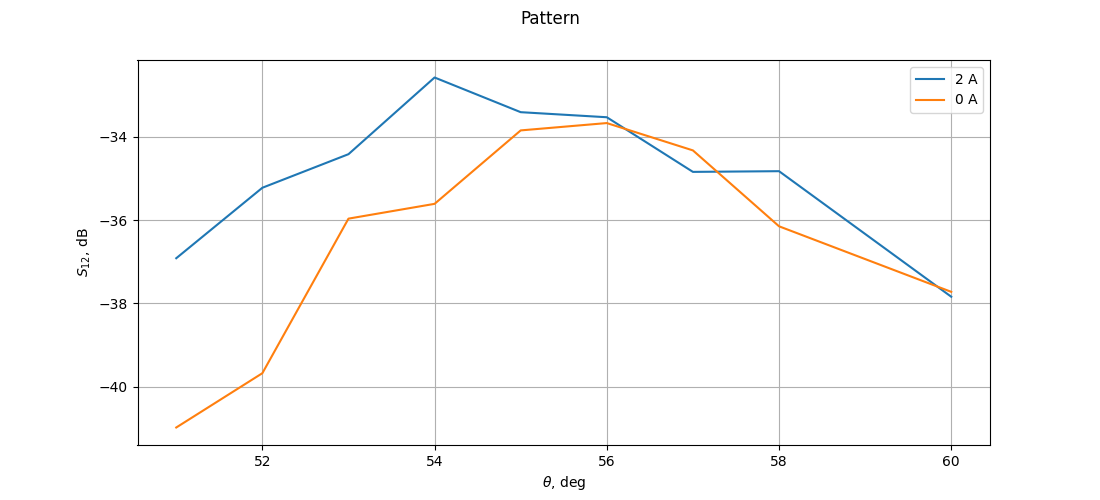

In [12]:
fig1 = plt.figure(figsize=(11,5))

ax_1 = fig1.add_subplot(111)
# ax_1.plot(data_0A['Angle'], 20*np.log10((data_2A['s12'] / data_0A['s12']).apply(abs)))
ax_1.plot(data_2A['Angle'], 20*np.log10(data_2A['s12'].apply(abs)), label='2 A')
ax_1.plot(data_0A['Angle'], 20*np.log10(data_0A['s12'].apply(abs)), label='0 A')
ax_1.set_xlabel(r'$\theta$, deg')
#ax_1.set_ylabel(r'$\dfrac{S_{12}(I=2 A)}{S_{12}(I=0 A)}$, dB')
ax_1.set_ylabel(r'$S_{12}$, dB')
ax_1.legend()
ax_1.grid()


fig1.suptitle('Pattern')
plt.show()

### Импорт данных из CST

In [10]:
cst_pattern = pd.read_csv('D_struct_0deg_farfield_TE.txt', sep=' ', header=None, skiprows=2,
                            skipinitialspace=True, index_col=False,
                            names=['theta', 'absP'], usecols=[0, 2])

FileNotFoundError: [Errno 2] No such file or directory: 'D_struct_0deg_farfield_TE.txt'

In [ ]:
cst_pattern.head()

,theta,absP
0,0.0,3.366
1,1.0,14.040
2,2.0,30.690
3,3.0,41.750
4,4.0,37.220


In [ ]:
max_power = cst_pattern.absP.max()
cst_pattern['normP_dB'] = 10 * np.log10(cst_pattern['absP'] / max_power)
cst_pattern.head()

c:\Users\Илья\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,theta,absP,normP_dB
0,0.0,3.366,-27.343867
1,1.0,14.040,-21.141337
2,2.0,30.690,-17.745039
3,3.0,41.750,-16.408443
4,4.0,37.220,-16.907244


In [ ]:
# np.sum(np.isnan(cst_pattern['normP_dB']))

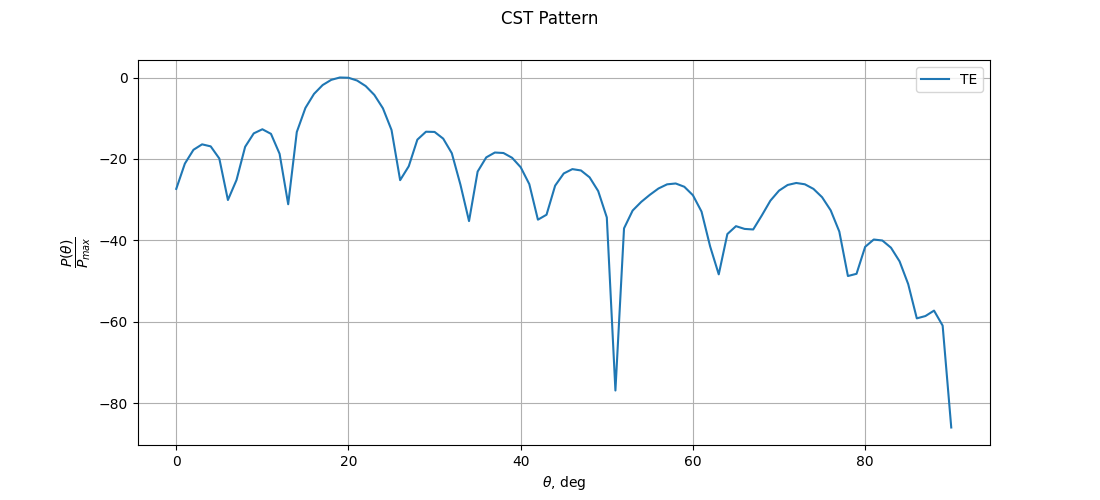

In [ ]:
fig1 = plt.figure(figsize=(11,5))

ax_1 = fig1.add_subplot(111)
ax_1.plot(cst_pattern['theta'], cst_pattern['normP_dB'], label='TE')
ax_1.set_xlabel(r'$\theta$, deg')
ax_1.set_ylabel(r'$\dfrac{P(\theta)}{P_{max}}$')
ax_1.legend()
ax_1.grid()


fig1.suptitle('CST Pattern')
plt.show()

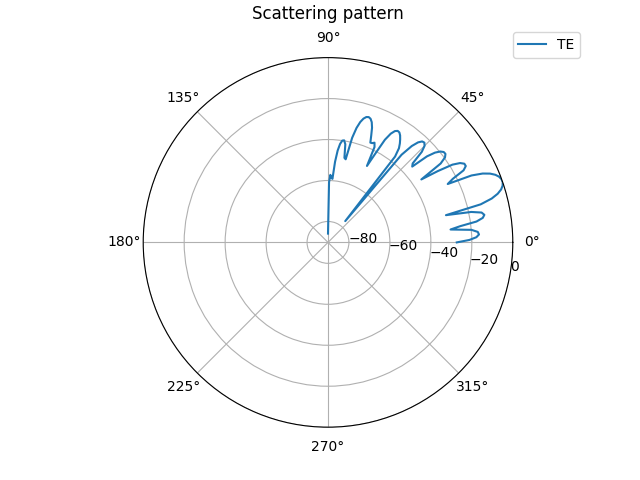

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(cst_pattern['theta']*np.pi/180, cst_pattern['normP_dB'], label='TE')
ax.set_rlabel_position(-10)  # Move radial labels away from plotted line
ax.legend(loc=(1, 1))
ax.grid(True)
ax.set_title("Scattering pattern", va='bottom');
plt.show()